# Testing document for pyGSLModel

### Testing model download and pruning functions

Standard HUMAN-GEM model downlaod test

In [ ]:
# Downloading standard Human-GEM model
from pyGSLModel import download_model

model_1 = download_model()

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

Converting gene symbols, model pruning, and removing transport reactions test

In [ ]:
# Converting gene names, pruning the model and removing GSl transport reactions
from pyGSLModel import convert_genes, prune_model, remove_GSL_transport

model_2 = convert_genes(model_1)
model_2 = prune_model(model_2)
model_2 = remove_GSL_transport(model_2)

print(f"Number of Reactions in model : {len(model_1.reactions)}")
print(f"Number of Metabolites in model : {len(model_1.metabolites)}")
print(f"Number of Genes in model : {len(model_1.genes)}")

print(f"Checking gene symbol conversion :")
model_1.genes.get_by_id("B4GALNT1")

Testing download of pre-pruned model

In [1]:
# Testing pre-pruned model download
from pyGSLModel import download_GSL_model

model_3 = download_GSL_model()

print(f"Number of Reactions in model : {len(model_3.reactions)}")
print(f"Number of Metabolites in model : {len(model_3.metabolites)}")
print(f"Number of Genes in model : {len(model_3.genes)}")

print(f"Checking gene symbol conversion :")
model_3.genes.get_by_id("UGT8")

Model succesfully downloaded and read in.
Number of Reactions in model : 2307
Number of Metabolites in model : 2009
Number of Genes in model : 2887
Checking gene symbol conversion :


Gene identifier,UGT8
Name,G_UGT8
Memory address,0x1e143ccc550
Functional,True
In 1 reaction(s),MAR00919


### Testing performing simulations and analysing results

Performing a generic FBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_1 = run_metabolic_model(model_3, method="FBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_1 = tabulate_model_results(model_3,sol_1)
print(results_1.head())

# Generating plot
fig_1 = plot_model_results(results_1)
fig_1

Performing a knockout simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_2 = run_metabolic_model(model_3, method="FBA",objective_choice="AC",knockout="B4GALNT1")

# Preparing dataframe
results_2 = tabulate_model_results(model_3,sol_2)
print(results_2.head())

# Generating plot
fig_2 = plot_model_results(results_2)
fig_2

Performing mFBA simulation

In [ ]:
from pyGSLModel import run_metabolic_model, tabulate_model_results, plot_model_results

# Running Basic simulation
sol_3 = run_metabolic_model(model_3, method="mFBA",objective_choice="D14_Neuron")

# Preparing dataframe
results_3 = tabulate_model_results(model_3,sol_3)
print(results_3.head())

# Generating plot
fig_3 = plot_model_results(results_3)
fig_3

Testing network visualisation. This saves a .html file

In [ ]:
from pyGSLModel import visualise_flux_network

visualise_flux_network(model_3,sol_3,file_path="./flux_network_test.html",height="1080px",width="100%")


### Transcriptomic integration testing

Testing standard iMAT integration

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

from pyGSLModel import iMAT_integrate, tabulate_model_results
sol_4 = iMAT_integrate(model_3,iMAT_df_1)

results_4 = tabulate_model_results(model_3, sol_4)
results_4.head()

Testing multi sample iMat integration with a dummy dataframe

In [ ]:
import pandas as pd
# Making a dummy dataframe
d = {
    "Gene" : ["B4GALNT1", "ST3GAL5", "ST8SIA1","A4GALT"],
    "Sample_1" : [8,6,4,2],
    "Sample_2" : [2,4,6,8],
    "Sample_3" : [6,2,8,4],
    "Sample_4" : [4,8,2,6]
}

# Converting the dictionary to a pandas dataframe and setting the index to Gene
iMAT_df_1 = pd.DataFrame(d)
iMAT_df_1 = iMAT_df_1.set_index("Gene").copy()

# Performing the iMAT integration for the custom data
from pyGSLModel import iMAT_multi_integrate
iMAT_res_1 = iMAT_multi_integrate(model_3, iMAT_df_1)

iMAT_res_1

Testing average TCGA integration with iMAT

In [2]:
from pyGSLModel import TCGA_iMAT_integrate

# Lets adjust upper and lower quantiles here to select the top and bottom 15% of genes instead. We're going to leave epsilon and threshold alone
iMAT_TCGA_1, sol_dict = TCGA_iMAT_integrate(model_3)

iMAT_TCGA_1.head()

Simulations Performed:1/107
Simulations Performed:2/107
Simulations Performed:3/107
Simulations Performed:4/107
Simulations Performed:5/107
Simulations Performed:6/107
Simulations Performed:7/107
Simulations Performed:8/107
Simulations Performed:9/107
Simulations Performed:10/107
Simulations Performed:11/107
Simulations Performed:12/107
Simulations Performed:13/107
Simulations Performed:14/107
Simulations Performed:15/107
Simulations Performed:16/107
Simulations Performed:17/107
Simulations Performed:18/107
Simulations Performed:19/107
Simulations Performed:20/107
Simulations Performed:21/107
Simulations Performed:22/107
Simulations Performed:23/107
Simulations Performed:24/107
Simulations Performed:25/107
Simulations Performed:26/107
Simulations Performed:27/107
Simulations Performed:28/107
Simulations Performed:29/107
Simulations Performed:30/107
Simulations Performed:31/107
Simulations Performed:32/107
Simulations Performed:33/107
Simulations Performed:34/107
Simulations Performed:3

Key Product,LacCer pool,globotriaosylceramide,globoside,GA2,GA1,GM1b,GD1alpha,GM3,GD1a,GD2,...,GT1a,GT1c,GQ1b,GT3,GQ1c,GD1c,sialyl-3-paragloboside,tissue,sample type,primary site
0,37.140284,22.086414,22.076414,13.04387,13.04387,13.04387,13.04387,2.000000,1.0,1.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,Adipose - Subcutaneous,Normal Tissue,Adipose Tissue
1,61.240299,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,59.220299,1.0,58.220299,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,Adipose - Visceral (Omentum),Normal Tissue,Adipose Tissue
2,45.512663,19.748499,19.748499,1.00000,1.00000,1.00000,1.00000,15.178916,1.0,1.000000,...,0.0,13.178916,0.0,13.178916,13.178916,0.0,1.0,Adrenal Gland,Normal Tissue,Adrenal Gland
3,51.331292,0.010000,0.010000,1.00000,1.00000,1.00000,1.00000,9.674258,1.0,1.000000,...,0.0,7.674258,0.0,7.674258,7.674258,0.0,1.0,Adrenocortical Cancer,Primary Tumor,Adrenal gland
4,4.000000,1.000000,1.000000,1.00000,1.00000,1.00000,1.00000,2.000000,1.0,1.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,Artery - Aorta,Normal Tissue,Blood Vessel


In [3]:
from pyGSLModel import tabulate_model_results, plot_model_results
brain_GBM_dat = tabulate_model_results(model_3,sol_dict["(\'Glioblastoma Multiforme\', \'Primary Tumor\', \'Brain\')_sol"])
brain_GBM_dat["status"] = "GBM"
brain_LGG_dat = tabulate_model_results(model_3,sol_dict["(\'Brain Lower Grade Glioma\', \'Primary Tumor\', \'Brain\')_sol"])
brain_LGG_dat["status"] = "LGG"
import pandas as pd
brain_df = pd.concat([brain_GBM_dat, brain_LGG_dat],axis=0)
brain_df.head()

,Reaction ID,Reactants,Products,Key Product,Genes,Flux (mmol/gDW/hr),Relative GSL Flux (%),status
0,MAR08147,"MAM01972g (glucosylceramide pool), MAM03107g (...","MAM02039g (H+), MAM02328g (LacCer pool), MAM03...",LacCer pool,B3GNT3,64.768396,20.843115,GBM
14,MAR08184,"MAM01592g (CMP-N-acetylneuraminate), MAM02328g...","MAM01590g (CMP), MAM02015g (GM3), MAM02039g (H+)",GM3,ST3GAL5,38.139074,12.273533,GBM
10,MAR08179,"MAM01592g (CMP-N-acetylneuraminate), MAM02015g...","MAM01590g (CMP), MAM01947g (GD3), MAM02039g (H+)",GD3,ST8SIA1,37.139074,11.951724,GBM
19,MAR08189,"MAM01592g (CMP-N-acetylneuraminate), MAM01943g...","MAM01590g (CMP), MAM02030g (GT1b), MAM02039g (H+)",GT1b,"ST3GAL4, ST3GAL1, ST3GAL2",37.129074,11.948505,GBM
21,MAR08191,"MAM01947g (GD3), MAM03110g (UDP-N-acetyl-D-gal...","MAM01946g (GD2), MAM02039g (H+), MAM03106g (UDP)",GD2,B4GALNT1,37.129074,11.948505,GBM


[Text(0.5, 0, '')]

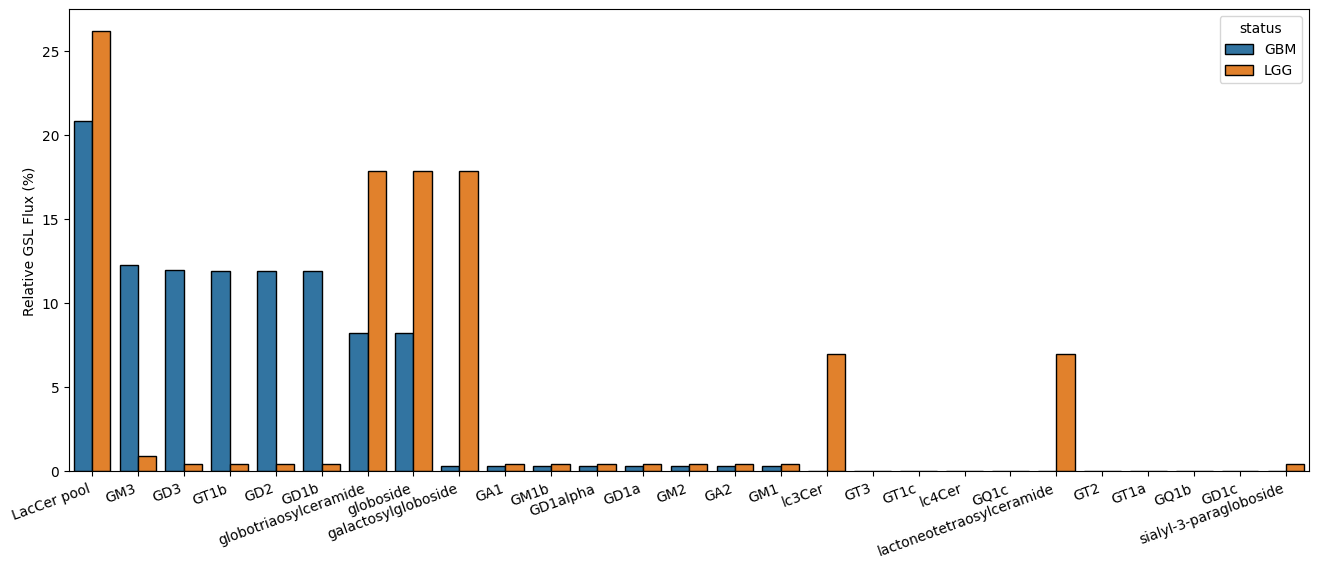

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,6))
ax = sns.barplot(brain_df,x="Key Product",y="Relative GSL Flux (%)",hue="status",edgecolor="black")
plt.xticks(rotation = 20,ha="right")
ax.set(xlabel=None)

In [ ]:
from pyGSLModel import visualise_flux_network
visualise_flux_network(model_3,sol_dict["(\'Glioblastoma Multiforme\', \'Primary Tumor\', \'Brain\')_sol"],file_path="./GBM_network.html",height="1080px",width="100%",rxn_col="#1f77b4",met_col="#abdcff")
visualise_flux_network(model_3,sol_dict["(\'Brain Lower Grade Glioma\', \'Primary Tumor\', \'Brain\')_sol"],file_path="./LGG_network.html",height="1080px",width="100%",rxn_col="#ff7f0e",met_col="#ffca9c")

html file wrtten to: C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/GBM_network.html
html file wrtten to: C:/Users/ottoc/OneDrive - University of Cambridge/PhD Year 3/GSL_Metabolism_Project/Python_Package/Brain_Vis/LGG_network.html


Testing sample wise iMAT integration of TCGA data

In [ ]:
from pyGSLModel import TCGA_iMAT_sample_integrate

# Selecting Bile duct for tissue argument as this has fewer samples (Brain has something like 2000 so takes a while). Leaving other arguments as default
iMAT_TCGA_sample = TCGA_iMAT_sample_integrate(model_3, tissue="Bile duct")

iMAT_TCGA_sample.head()